In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
import random

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Build the Image classification model by dividing the model into following 4 stages:
1.	Loading and preprocessing the image data
2.	Defining the model's architecture
3.	Training the model
4.	Estimating the model's performance



Implement and train a Convulutional neural network (CNN) on an hand-written digits image dataset called MNIST  
and improve model generalisation by achieving increased accuracy and decreased loss where model gains good confidence
with the prediction


In [2]:
#These lines load the MNIST dataset, which is a dataset of handwritten digits. It's divided into a training set (x_train and y_train) and a test set (x_test and y_test). 
#x_train contains the images of handwritten digits, and y_train contains the corresponding labels

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# defines the input shape for the neural network. MNIST images are 28x28 pixels and are grayscale, so the depth is 1
input_shape = (28, 28, 1)                          #width,height,depth (images are gray scale so 1)

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
#reshape the training and test data to match the defined input shape by adding an extra dimension for the depth

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [5]:
x_train.shape

(60000, 28, 28, 1)

In [6]:
x_train.dtype

dtype('uint8')

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [8]:
x_train.dtype

dtype('float32')

In [9]:
# normalize the pixel values of the images by dividing them by 255, which scales the values to the range [0, 1].

x_train = x_train/255
x_test = x_test/255
print("Shape of Training : ", x_train.shape)
print("Shape of Testing : ", x_test.shape)

Shape of Training :  (60000, 28, 28, 1)
Shape of Testing :  (10000, 28, 28, 1)


In [10]:
#These lines define a convolutional neural network (CNN) model using Keras. 
#The model consists of convolutional layers, max-pooling layers, a flattening layer, dense (fully connected) layers, 
#and dropout for regularization. model.summary() prints a summary of the model's architecture


model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 200)               946600    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2010      
                                                        

In [11]:
# compile and train the model

model.compile(optimizer='adam', loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(x_train, y_train, epochs = 2)

Epoch 1/2
1875/1875 [==============================] - 54s 28ms/step - loss: 0.2037 - accuracy: 0.9392
Epoch 2/2
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0808 - accuracy: 0.9748


In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0571 - accuracy: 0.9828
Loss=0.057
Accuracy=0.983


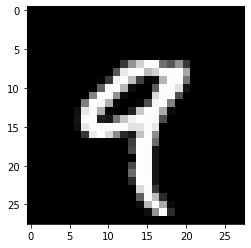

In [13]:
image = x_train[4]
plt.imshow(np.squeeze(image), cmap='gray')         #squeeze() function is used when we want to remove single-dimensional entries from the shape of an array
plt.show()

In [14]:
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
predict_model = model.predict([image])
print("Predicted class: {}".format(np.argmax(predict_model)))

1/1 [==============================] - 0s 94ms/step
Predicted class: 9


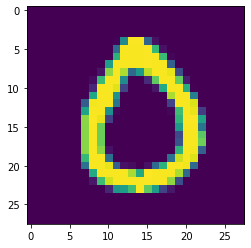

In [15]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [16]:
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 2s 5ms/step
Handwritten number in the image is= 0


Thus, we have implemented the Image classification model using CNN. With above code we can see that sufficient accuracy has been met. Throughout the epochs, our model accuracy increases and loss decreases that is good since our model gains confidence with our prediction
This indicates the model is trained in a good way
1.	The loss is decreasing and the accuracy is increasing with every epoch.
2.	The test accuracy is the measure of how good the model is predicting so, it is observed that the model is well trained after 10 epochs
